In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Tractor-Sales.csv')
df.head()

,Month-Year,Number of Tractor Sold
0,01-01-2003,141
1,01-02-2003,157
2,01-03-2003,185
3,01-04-2003,199
4,01-05-2003,203


In [3]:
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(df))

In [4]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [5]:
import calendar
df['Month'] = dates.month

In [6]:
df.head()

,Month-Year,Number of Tractor Sold,Month
0,01-01-2003,141,1
1,01-02-2003,157,2
2,01-03-2003,185,3
3,01-04-2003,199,4
4,01-05-2003,203,5


In [7]:
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [8]:
df.head()

,Month-Year,Number of Tractor Sold,Month
0,01-01-2003,141,Jan
1,01-02-2003,157,Feb
2,01-03-2003,185,Mar
3,01-04-2003,199,Apr
4,01-05-2003,203,May


In [9]:
df['Year'] = dates.year

In [10]:
df.head()

,Month-Year,Number of Tractor Sold,Month,Year
0,01-01-2003,141,Jan,2003
1,01-02-2003,157,Feb,2003
2,01-03-2003,185,Mar,2003
3,01-04-2003,199,Apr,2003
4,01-05-2003,203,May,2003


In [11]:
df.drop(['Month-Year'], axis=1, inplace=True)

In [12]:
df.head()

,Number of Tractor Sold,Month,Year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [13]:
df.rename(columns={'Number of Tractor Sold':'Tractor-Sales','Month-Year':'Month'}, inplace=True)

In [14]:
df = df[['Month', 'Year', 'Tractor-Sales']]

In [15]:
df.head()

,Month,Year,Tractor-Sales
0,Jan,2003,141
1,Feb,2003,157
2,Mar,2003,185
3,Apr,2003,199
4,May,2003,203


In [16]:
df.set_index(dates, inplace=True)

In [17]:
#df.head()

In [18]:
df.isnull().sum()

Month            0
Year             0
Tractor-Sales    0
dtype: int64

In [19]:
df.drop(['Month','Year'],axis=1,inplace=True)

In [20]:
df.shape

(144, 1)

In [21]:
df.describe()

,Tractor-Sales
count,144.000000
mean,389.694444
std,171.500016
min,138.000000
25%,248.500000
50%,369.000000
75%,509.250000
max,871.000000


In [22]:
df.tail()

,Tractor-Sales
2014-08-01,848
2014-09-01,640
2014-10-01,581
2014-11-01,519
2014-12-01,605


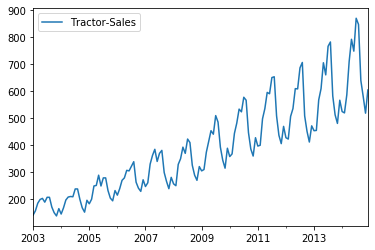

In [23]:
df.plot()

## Smoothing

In [24]:
df_moving_avg = df.rolling(window=12).mean()
df_moving_std = df.rolling(window=12).std()

In [25]:
df_moving_avg.head(20)

,Tractor-Sales
2003-01-01,NaN
2003-02-01,NaN
2003-03-01,NaN
2003-04-01,NaN
2003-05-01,NaN
2003-06-01,NaN
2003-07-01,NaN
2003-08-01,NaN
2003-09-01,NaN
2003-10-01,NaN


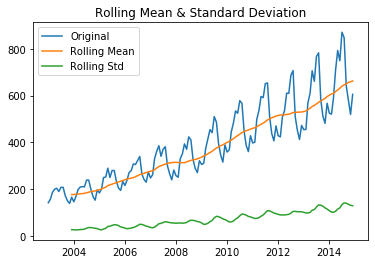

In [26]:
orig = plt.plot(df, label='Original')
mean = plt.plot(df_moving_avg, label='Rolling Mean')
std = plt.plot(df_moving_std, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## BaseLine Model (Naive Model)

In [27]:
df_base = pd.concat([df,df.shift(1)],axis=1)

In [28]:
df_base

,Tractor-Sales,Tractor-Sales
2003-01-01,141,NaN
2003-02-01,157,141.0
2003-03-01,185,157.0
2003-04-01,199,185.0
2003-05-01,203,199.0
...,...,...
2014-08-01,848,871.0
2014-09-01,640,848.0
2014-10-01,581,640.0
2014-11-01,519,581.0


In [29]:
df_base.columns=['Actual_value','Forecast_value']

In [30]:
df_base

,Actual_value,Forecast_value
2003-01-01,141,NaN
2003-02-01,157,141.0
2003-03-01,185,157.0
2003-04-01,199,185.0
2003-05-01,203,199.0
...,...,...
2014-08-01,848,871.0
2014-09-01,640,848.0
2014-10-01,581,640.0
2014-11-01,519,581.0


In [31]:
df_base.dtypes

Actual_value        int64
Forecast_value    float64
dtype: object

In [32]:
df_base.dropna(inplace=True)

In [33]:
df_base['Forecast_value'] = df_base['Forecast_value'].astype(int)

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
df_error = mean_squared_error(df_base.Actual_value,df_base.Forecast_value)

In [36]:
df_error

3227.3706293706296

In [37]:
np.sqrt(df_error)

56.809951851507755

## ARIMA Model

In [38]:
df.head()

,Tractor-Sales
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203


In [39]:
df.tail()

,Tractor-Sales
2014-08-01,848
2014-09-01,640
2014-10-01,581
2014-11-01,519
2014-12-01,605


In [40]:
df.isnull().sum()

Tractor-Sales    0
dtype: int64

In [41]:
df.dtypes

Tractor-Sales    int64
dtype: object

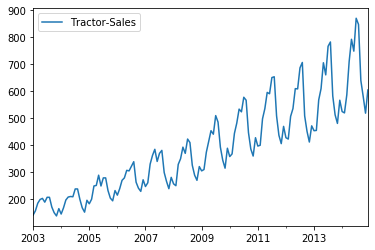

In [42]:
df.plot()

In [43]:
from statsmodels.tsa.stattools import adfuller

In [44]:
test_result=adfuller(df['Tractor-Sales'])

In [45]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [46]:
adfuller_test(df['Tractor-Sales'])

ADF Test Statistic : 1.1088250591467306
p-value : 0.9952912415248419
#Lags Used : 14
Number of Observations Used : 129
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [47]:
df['Sales First Difference'] = df['Tractor-Sales'] - df['Tractor-Sales'].shift(1)

In [48]:
df['Seasonal First Difference']=df['Tractor-Sales']-df['Tractor-Sales'].shift(12)

In [49]:
df.head(15)

,Tractor-Sales,Sales First Difference,Seasonal First Difference
2003-01-01,141,NaN,NaN
2003-02-01,157,16.0,NaN
2003-03-01,185,28.0,NaN
2003-04-01,199,14.0,NaN
2003-05-01,203,4.0,NaN
2003-06-01,189,-14.0,NaN
2003-07-01,207,18.0,NaN
2003-08-01,207,0.0,NaN
2003-09-01,171,-36.0,NaN
2003-10-01,150,-21.0,NaN


In [50]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.5046148053109887
p-value : 0.00786936404302729
#Lags Used : 1
Number of Observations Used : 130
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


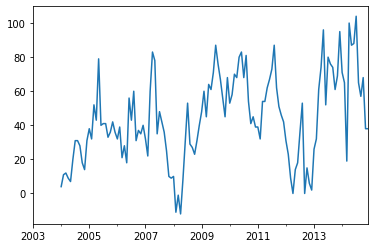

In [51]:
df['Seasonal First Difference'].plot()

In [52]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

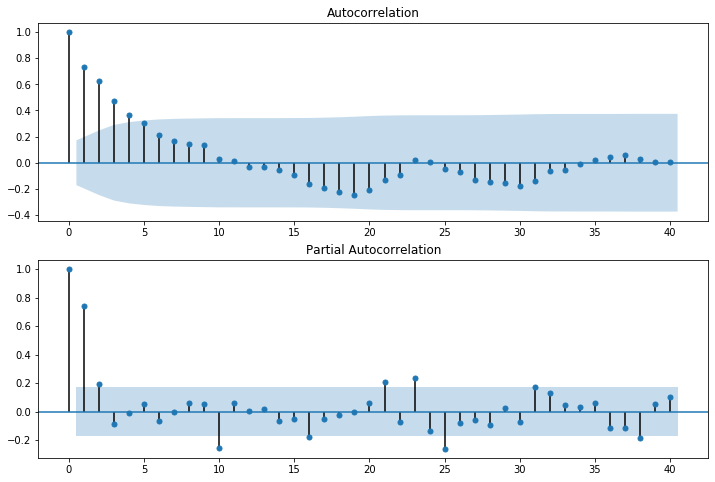

In [53]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [54]:
from statsmodels.tsa.arima_model import ARIMA
# p=2,d=1,q=4,5

In [55]:
model=ARIMA(df['Tractor-Sales'],order=(2,1,4))
model_fit=model.fit()

In [56]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.Tractor-Sales   No. Observations:                  143
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -746.427
Method:                       css-mle   S.D. of innovations             43.044
Date:                Fri, 28 Aug 2020   AIC                           1508.855
Time:                        21:47:37   BIC                           1532.557
Sample:                    02-01-2003   HQIC                          1518.486
                         - 12-01-2014                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.7237      0.273     13.628      0.000       3.188       4.259
ar.L1.D.Tractor-Sales     0.6671      0.088      7.540      0.000       0.494       0.841
ar.L2.D.Tractor-Sales    -0.4664      0.080     -5.825      0.000      -0.623      -0.309
ma.L1.D.Tractor-Sales    -0.7327      0.055    -13.372      0.000      -0.840      -0.625
ma.L2.D.Tractor-Sales     0.1391      0.073      1.901      0.059      -0.004       0.283
ma.L3.D.Tractor-Sales     0.5090      0.063      8.024      0.000       0.385       0.633
ma.L4.D.Tractor-Sales    -0.9154      0.056    -16.413      0.000      -1.025      -0.806
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7151           -1.2777j            1.4642           -0.1688
AR.2            0.7151           +1.2777j            1.4642            0.1688
MA.1           -1.0923           -0.0000j            1.0923           -0.5000
MA.2            0.3241           -0.9461j            1.0001           -0.1975
MA.3            0.3241           +0.9461j            1.0001            0.1975
MA.4            1.0000           -0.0000j            1.0000           -0.0000
-----------------------------------------------------------------------------
"""

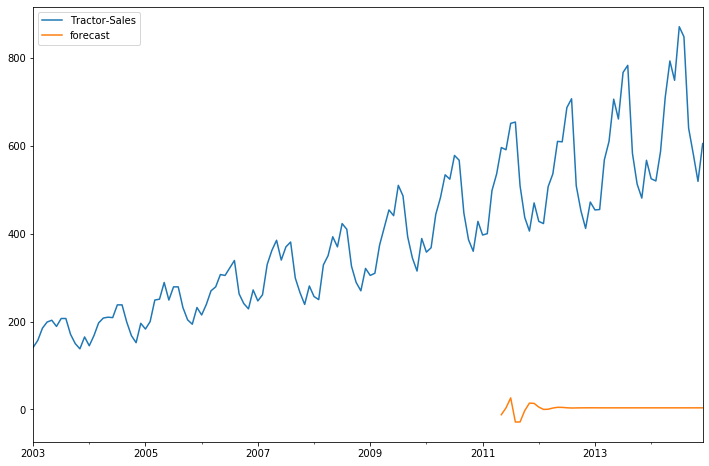

In [57]:
df['forecast']=model_fit.predict(start=100,end=144,dynamic=True)
df[['Tractor-Sales','forecast']].plot(figsize=(12,8))

In [58]:
import statsmodels.api as sm

In [59]:
model=sm.tsa.statespace.SARIMAX(df['Tractor-Sales'],order=(2, 1, 4),seasonal_order=(2,1,4,6))
results=model.fit()

C:\Users\Ashish\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Ashish\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


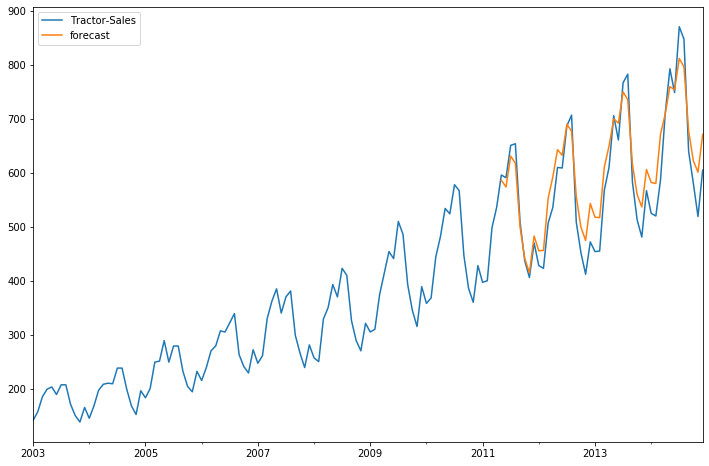

In [60]:
df['forecast']=results.predict(start=100,end=144,dynamic=True)
df[['Tractor-Sales','forecast']].plot(figsize=(12,8))

In [61]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [62]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [63]:
future_datest_df.tail()

,Tractor-Sales,Sales First Difference,Seasonal First Difference,forecast
2016-07-01,NaN,NaN,NaN,NaN
2016-08-01,NaN,NaN,NaN,NaN
2016-09-01,NaN,NaN,NaN,NaN
2016-10-01,NaN,NaN,NaN,NaN
2016-11-01,NaN,NaN,NaN,NaN


In [64]:
future_df=pd.concat([df,future_datest_df])

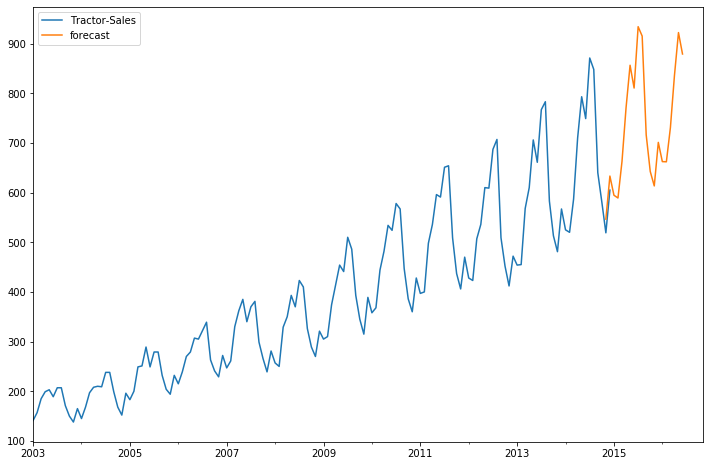

In [65]:
future_df['forecast'] = results.predict(start = 142, end = 161, dynamic= True)  
future_df[['Tractor-Sales', 'forecast']].plot(figsize=(12, 8))